<a href="https://colab.research.google.com/github/Rafarinh0/chicago_airbnb/blob/master/Chicago_Airbnb_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Airbnb Data Analysis - Chicago(IL)

[Airbnb](https://www.airbnb.com.br/) is considered the **biggest hotel chain in the world**. The detail is: they **don't have any hotels**!

Connecting people that want to travel (and have their own place to stay) with hosts that want to rent their properties conveniently, Airbnb provides a innovative platform to make this alternative hosting.

By the end of 2018, the company, which was founded 13 years ago, had already **hosted more than 300 million** people around the globe, challeging the more traditional hotel companies.

One of Airbnb's features is to provide data for some of the big cities in the world. At [Inside Airbnb](http://insideairbnb.com/get-the-data.html), a considerable amount of data can be downloaded, which can be used for the sake of project developments and **data science** solutions.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**In this *notebook*, we're going to analyze the data referring to Chicago, the third largest city in the United States, and see what insights can be taken out from the raw data.**

## Obtaining data


In [1]:
# importing the required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [29]:
from google.colab import files
uploaded = files.upload()

Saving listings.csv to listings (1).csv


In [30]:
# import listings.csv for the Dataframe
import io
df = pd.read_csv(io.BytesIO(uploaded['listings.csv']))
# Dataset is now stored in a Pandas Dataframe

## Data Analysis


This section serves to create initial awareness and allows for an understanding of how the data is structured.

**Variable Glossary**

* `id` - number generated to identify the property
* `name` - name of the advertised property
* `host_id` - id number for the host
* `host_name` - name of the host
* `neighbourhood_group` - this column doesn't have any valid values
* `neighbourhood` - name of the property's neighbourhood
* `latitude` - latitude coordinate
* `longitude` - longitude coordinate
* `room_type` - informs the type of room offered
* `price` - the price to rent a property (in dollars)
* `minimum_nights` - minimum amount of nights of stay
* `number_of_reviews` - number of reviews the property has
* `last_review` - date of the last review
* `reviews_per_month` - amount of reviews monthly
* `calculated_host_listings_count` - amount of properties owned by a same host
* `availability_365` - number of days of availability within 365 days

Before diving into any analysis, let's get a hint of our *dataset*, looking at the first 5 entries.

In [31]:
# showing the first 5 entries
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2384,Hyde Park - Walk to University of Chicago,2613,Rebecca,NaN,Hyde Park,41.78790,-87.58780,Private room,85,1,185,2021-06-21,2.45,1,338
1,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,NaN,West Town,41.90166,-87.68021,Entire home/apt,65,2,401,2021-05-22,3.32,1,59
2,10945,The Biddle House (#1),33004,At Home Inn,NaN,Lincoln Park,41.91196,-87.63981,Entire home/apt,143,4,28,2021-06-21,0.32,10,102
3,12068,Chicago GOLD COAST 1 Bedroom Condo,40731,Dominic,NaN,Near North Side,41.90491,-87.63213,Entire home/apt,99,7,11,2021-05-09,0.14,1,242
4,12140,Lincoln Park Guest House,46734,Sharon And Robert,NaN,Lincoln Park,41.92357,-87.64947,Private room,329,2,7,2021-07-06,0.10,1,165


### **Q1. How many attributes (variables) and entries our dataset has? What is the type of the variables**

In [32]:
# identify the data volume from the Dataframe
print("Variables:\t {}".format(df.shape[0]))
print("Variables:\t {}\n".format(df.shape[1]))

# verify the first 5 entries of the dataset
display(df.dtypes)

Variables:	 6366
Variables:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. What is the percentage of missing values  in the *dataset*?**

The quality of a dataset is directly related to the amount of missing values. It's important to understand right at the beginning of the analysis if those null values are significative compared to the total of entries.

In [33]:
# variables ordered decrescently by their missing values

(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)


neighbourhood_group               1.000000
reviews_per_month                 0.170280
last_review                       0.170280
host_name                         0.000157
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64



*   *neighbourhood_group* has 100% of their values as "missing values"
*   The *reviews_per_month* and *last_review* variables have missing values in almost a fifth of their rows.





### **Q3. What kind of distribution the variables present?** 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcfc9ca0a50>,
      dtype=object)

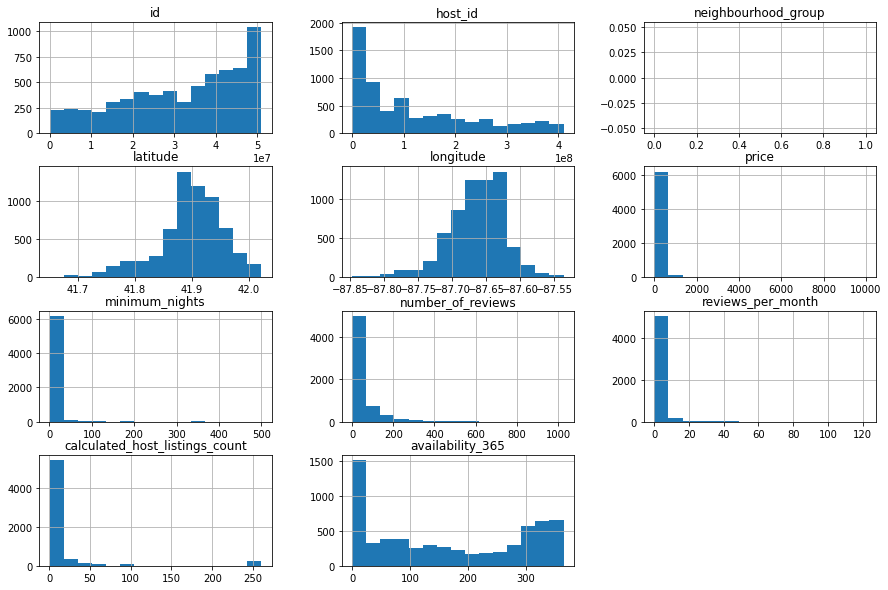

In [34]:
# plotting the histogram for the numeric variables
df.hist(bins=15, figsize=(15,10))

### **Q4. What is the average renting price?**

In [36]:
# show the average of the `price` column
print("US$",round(df["price"].mean(), 2))

US$ 183.1


### **Q5. Are there any outliers?**

Looking at the histogram's distribution, it's possible to find evidence of the presence of outliers. Let's look, for example, at the *price*, *minimum_nights* and *calculated_host_listings_count* variables.

The values don't follow a distribution, therefore distorting all the graphic representation. There are two quick ways that help finding the presence of outliers, being them:


* Statistical summary using the `describe()` method.
* Plotting the variable's `boxplots`.



In [37]:
# statistical summary for the numeric variables
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,6366.000000,6366.000000,6366.000000,5282.000000,6366.000000,6366.000000
mean,183.095507,9.036444,43.570531,2.663760,18.188187,164.887370
std,346.386112,24.009816,71.584210,4.792862,52.015806,132.395469
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,75.000000,1.000000,2.000000,0.470000,1.000000,31.000000
50%,120.000000,2.000000,13.000000,1.480000,2.000000,146.000000
75%,199.000000,4.000000,55.000000,3.300000,9.000000,305.000000
max,9999.000000,500.000000,1027.000000,121.820000,260.000000,365.000000


Looking at our summary, we can confirm some assumptions, like:
*   *price* variable has 75% of it's values below 199, but the highest value is 9999
*   *mininum_nights* is above the real limit of 365 days a year.



#### **Boxplot for *price***

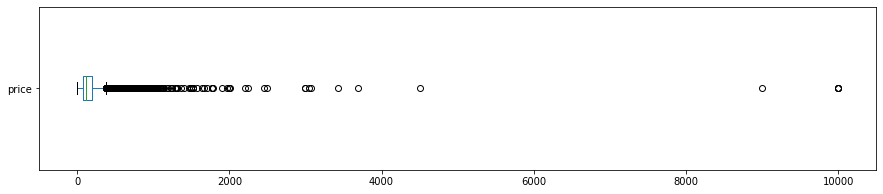


price: values above 600
205 entries
3.2202%


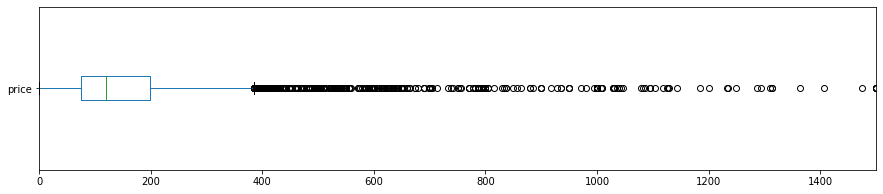

In [50]:
#price
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# amount of values above 600 for 'price'
print("\nprice: values above 600")
print("{} entries".format(len(df[df.price > 600])))
print("{:.4f}%".format((len(df[df.price > 600]) / df.shape[0])*100))

# more detailed version of the bloxplot
df.price.plot(kind='box', vert=False, xlim=(0,1500), figsize=(15,3))

#### **Bloxplot for *minimum_nights***

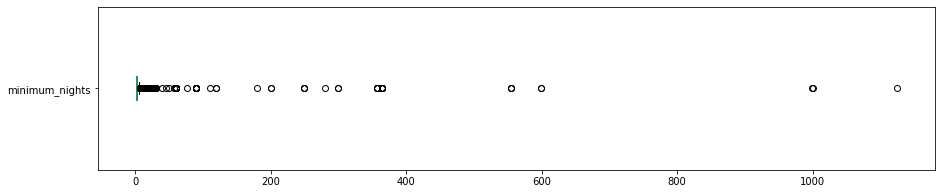


price: values above 30
62 entries
0.9346%


In [ ]:
#minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# amount of values above 30 for 'minimum_nights'
print("\nprice: values above 30")
print("{} entries".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Histogram without outliers

Since some outliers were identified in the *minimum_heights* and *price* variables, the DataFrame can be cleaned and the histogram is plotted again.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcfc814aa10>,
      dtype=object)

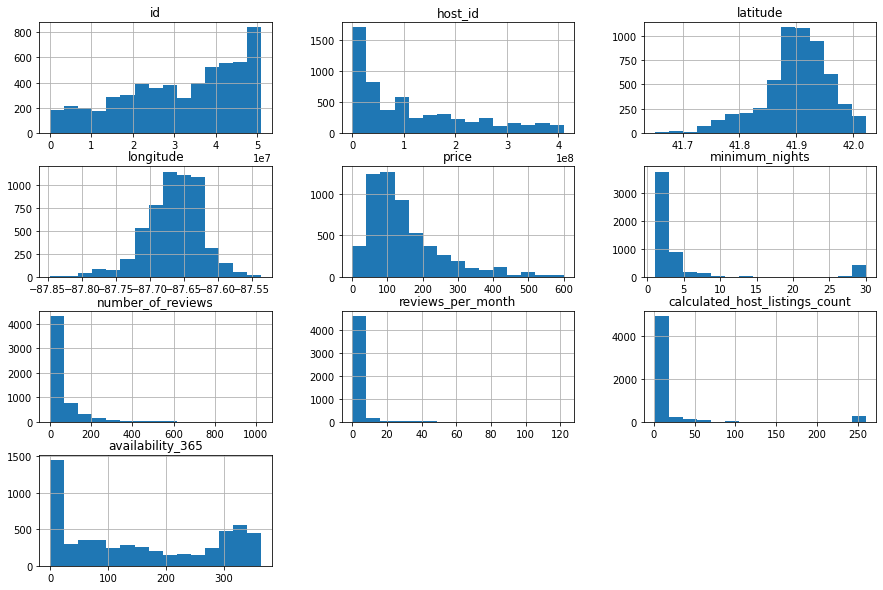

In [49]:
# removing the outliers
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 600].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# removing `neighbourhood_group`, because it's empty
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotting the histogram for the numeric values, again
df_clean.hist(bins=15, figsize=(15, 10))

### **Q6. What are the correlations between the variables?**

Correlation means that is a relation between two things. In the context of this analysis, we're finding relation or resemblance between two variables.

This relation can be measured, and the correlation coeficient's role is to establish it's intensity. To identify the existent correlations, we can:


*   Create a correlation matrix
*   Generate a heatmap from this matrix, using the `seaborn` library



In [51]:
# create a correlation matrix
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
# show the correlation matrix
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.033214,-0.104343,0.011469,0.106116,0.129771
minimum_nights,0.033214,1.000000,-0.184521,-0.103060,0.659751,0.151105
number_of_reviews,-0.104343,-0.184521,1.000000,0.304799,-0.146112,0.019968
reviews_per_month,0.011469,-0.103060,0.304799,1.000000,-0.025204,0.116519
calculated_host_listings_count,0.106116,0.659751,-0.146112,-0.025204,1.000000,0.224400
availability_365,0.129771,0.151105,0.019968,0.116519,0.224400,1.000000


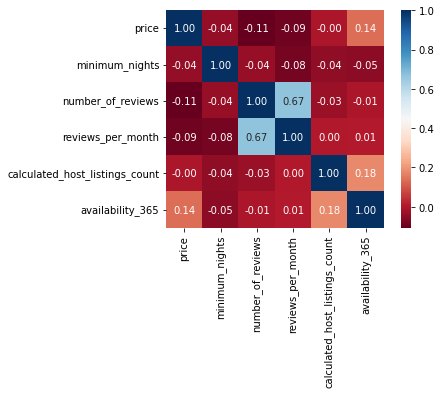

In [19]:
# plotting a heatmap from the correlations
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)

### **Q7. What is the most rented property type on Airbnb ?**

The column for `room_type` indicates the type of location that is being advertised on Airbnb. If you've already rented, you know that are options for apartments and full houses, single room renting or even sharing a room with other people.

Let's count the amount of occurrences of each type of rent, using `value_counts()`.

In [52]:
# show the amount of each type of property available
df_clean.room_type.value_counts()

Entire home/apt    3950
Private room       1537
Shared room          86
Hotel room           65
Name: room_type, dtype: int64

In [53]:
# percentage
df_clean.room_type.value_counts()/df_clean.shape[0]

Entire home/apt    0.700603
Private room       0.272614
Shared room        0.015254
Hotel room         0.011529
Name: room_type, dtype: float64

### **Q8. What is the most expensive location?**



A way to check if a certain variable in function of another is by using *groupby()*. In this case, we want to compare neighbourhoods by their rent price.

In [60]:
# average price for each neighbourhood in Chicago
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]


neighbourhood
Loop               226.138790
Near South Side    211.434783
Lincoln Park       205.630769
Near North Side    204.755102
Burnside           200.000000
North Center       175.241379
Lake View          169.328740
Near West Side     162.596491
West Town          157.840510
Uptown             151.397661
Name: price, dtype: float64

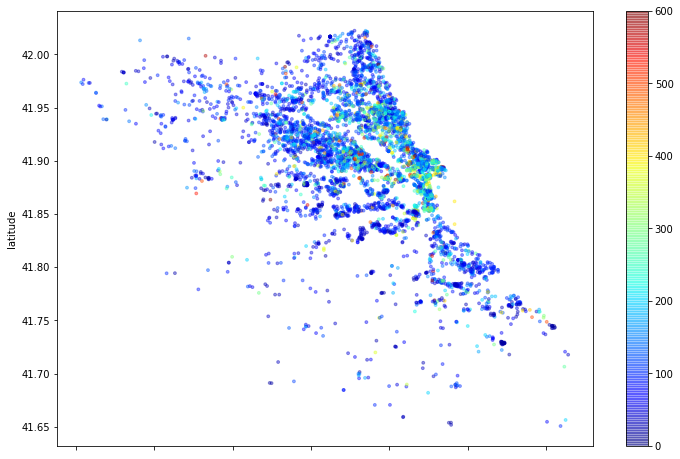

In [61]:
# plotting the latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusion


*   Only a superficial analysis was made in the dataset, but it was already noticed that there are outliers in some of the variables.
*   It was also noted that, in some locations, there are few properties available, which can distort the statistical information of some attributes.
*   Finally, is important to clarify that this dataset is a summarized version, ideal only for an initial approach. It's recommendeded to use the complete dataset, with 106 available attributes, in a future exploratory analysis.

